   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

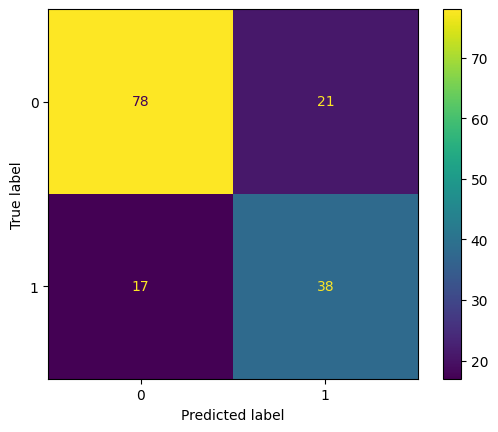

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 1: Column names
column_names = [
    "Pregnancies",
    "Glucose",
    "BloodPressure",
    "SkinThickness",
    "Insulin",
    "BMI",
    "DiabetesPedigreeFunction",
    "Age",
    "Outcome"
]

# Step 2: Load dataset correctly (IMPORTANT FIX)
df = pd.read_csv(
    "pima-indians-diabetes.csv",
    names=column_names,
    header=None,
    comment="#"      # <-- ignores lines starting with #
)

print(df.head())
print(df.info())

# Step 3: Replace invalid zeros
cols_with_zero_invalid = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

for col in cols_with_zero_invalid:
    df[col] = df[col].replace(0, df[col].mean())

# Step 4: Split data
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 5: Train model
model = GaussianNB()
model.fit(x_train, y_train)

# Step 6: Predictions
y_pred = model.predict(x_test)

# Step 7: Evaluation
print("\nAccuracy:", accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)
print("\nclassification report : ",classification_report(y_test, y_pred))

# Step 8: Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
